In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
epsilon = 1e-5

# 感知机

## 原始形式

输入空间$\mathcal{X}\in \mathbf{R}^n$，输出空间$\mathcal{Y}\in \{+1,-1\}$，映射如下
$$f(x) = \text{sign}(w\cdot x+b)$$
有一点需要注意的是**感知机假设数据集是线性可分的**，也就是会有一个分割超平面会把数据集完全正确的分隔开

输入空间中一点$x_0$到超平面的距离为
$$\frac{|w\cdot x_0 + b|}{\|w\|}$$
由于在超平面下的分类结果为
$$
y_i = \left\{\begin{matrix}
+1 & w\cdot x_i +b > 0 \\ 
-1 & w\cdot x_i +b < 0
\end{matrix}\right.
$$
误分类点可判定为$-y_i(w\cdot x_i +b)>0$
损失函数设定为误分类点的集合为$M$到超平面的总距离为，
$$
\sum_{x_i\in M}\frac{-y_i(w\cdot x_i +b)}{\|w\|}
$$
不考虑$\frac{1}{\|w\|}$，损失函数为
$$
L(w,b) = -\sum_{x_i\in M}y_i(w\cdot x_i+b)
$$
最小化需要对其求梯度
$$
\nabla_wL(w,b) = -\sum_{x_i\in M}y_ix_i \\
\nabla_bL(w,b) = -\sum_{x_i\in M}y_i
$$

进行梯度下降的时候需要注意，每次只选取一个误分类点$(x_i,y_i)$进行梯度下降
$$
w \leftarrow w+\eta y_ix_i \\
b \leftarrow b + \eta y_i
$$

**如果原始数据集线性不可分，会陷入无限循环**

In [3]:
def perceptron(X, Y, eta):
    w = np.zeros(X.shape[1])
    b = 0
    M = []
    def get_M():
        M.clear()
        for index, (x, y) in enumerate(zip(X, Y)):
            if y*(np.dot(w, x) + b) <= 0:
                M.append(index)
        return M
    while len(get_M()) > 0:
        i = np.random.choice(M)
        x, y = X[i], Y[i]
        w = w + eta * y * x
        b = b + eta * y
    return w, b

### 例2.1

In [4]:
## 例2.1
X = np.array([[3,3],[4,3],[1,1]])
Y = np.array([[1], [1], [-1]])
w, b = perceptron(X, Y, 1)
w, b

(array([1., 0.]), array([-2]))

[0, 6, 0, 6]

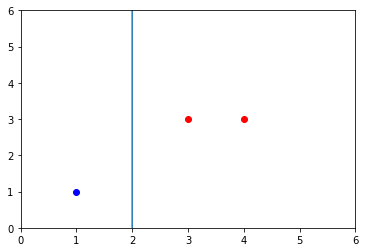

In [5]:
postive_X = X[np.where(Y>0)[0]]
plt.plot(postive_X[:,0], postive_X[:,1], 'ro')
negative_X = X[np.where(Y<0)[0]]
plt.plot(negative_X[:,0], negative_X[:,1], 'bo')
aX = np.arange(0, 6, 0.1)
aY = (-b - w[0]*aX)/(w[1]+epsilon)
plt.plot(aX, aY)
plt.axis([0,6, 0, 6])

## 算法收敛性

需要证明算法的迭代次数存在上界，$P_{31}$，经过有限次迭代可以得到一个将训练数据集完全正确划分的分离超平面。这个证明是Novikoff在1962年给出的，收敛证明很重要

> **定理 2.1 (Novikoff)**  设训练数据集$T=\{(x_1,y_1),(x_2,y_2),\cdots, (x_N,y_N)\}$是线性可分的，其中$x_i \in \mathcal{X}=\mathbf{R}^n$，$y_i\in \{-1, +1\}$，$i = 1,2,\cdots,N$，则
 - 存在满足条件$\|\hat{w}_{\text{opt}}\|=1$的超平面$\hat{w}_{\text{opt}}\cdot \hat{x} = w_{\text{opt}}\cdot x + b_{\text{opt}}=0$将训练数据集完全正确分开；且满足$\gamma>0$，对所有$i=1,2,\cdots, N$
 $$
 y_i(\hat{w}_{\text{opt}}\cdot \hat{x}_i) = y_i(w_{\text{opt}}\cdot x_i + b_{\text{opt}}) \geq \gamma
 $$
 - 令$R = \underset{1\le i\le N}{\max}\|\hat{x}_i\|$，则感知器在训练数据集上的误分类次数$k$满足不等式
 $$k\le \left( \frac{R}{\gamma} \right)^2$$
 
证明：
 - 由于训练数据集是线性可分的，所以存在超平面使训练集完全正确的分开，可取该超平面为$\hat{w}_{\text{opt}}\cdot \hat{x} = w_{\text{opt}}\cdot x + b_{\text{opt}}=0$，并满足$\|\hat{w}_{\text{opt}}\|=1$，故对所有的训练数据集$i=1,2,\cdots , N$
 $$y_i(\hat{w}_{\text{opt}}\cdot \hat{x}_i) = y_i(w_{\text{opt}}\cdot x_i + b_{\text{opt}}) = 0$$
 所以存在$$\gamma = \underset{i}{\min}\{y_i(w_{\text{opt}}\cdot x_i + b_{\text{opt}})\}$$使
 $$
 y_i(\hat{w}_{\text{opt}}\cdot \hat{x}_i) = y_i(w_{\text{opt}}\cdot x_i + b_{\text{opt}}) \geq \gamma
 $$
 - 设$\hat{w}_{k-1} = (w_{k-1}^T,b_{k-1})^T$表示第$k-1$次迭代得到的参数，并且第k次迭代中根据判别条件得到的误分类样例为$(x_i,y_i)$，则$w$和$b$的更新为
 $$
 \begin{split}
 w_k & \leftarrow w_{k-1} + \eta y_i x_i \\
 b_k & \leftarrow b_{k-1} + \eta y_i
 \end{split}
 $$
 即
 $$\hat{w}_k = \hat{w}_{k-1} + \eta y_i \hat{x}_i$$
 现在推倒两个不等式：
     - (1) $$\hat{w}_k \cdot \hat{w}_{\text{opt}} \geq k\eta\gamma$$
     推倒：
     $$
     \begin{split}
        \hat{w}_k \cdot \hat{w}_{\text{opt}} & = (\hat{w}_{k-1} + \eta y_i \hat{x}_i)\cdot \hat{w}_{\text{opt}} \\
            & = \hat{w}_{k-1} \cdot \hat{w}_{\text{opt}} + \eta y_i \hat{w}_{\text{opt}} \cdot \hat{x}_i \\
            & \geq \hat{w}_{k-1}\cdot \hat{w}_{\text{opt}} + \eta\gamma \\
            & \geq \hat{w}_{k-2}\cdot \hat{w}_{\text{opt}} + 2\eta\gamma \\
            & \geq \cdots\\
            & \geq k\eta \gamma
     \end{split}
     $$
     - (2) $$\|\hat{w}_k\|^2\le k\eta^2R^2$$
     推倒：
     $$
     \begin{split}
    \|\hat{w}_k\|^2 & = \| \hat{w}_{k-1} + \eta y_i\hat{x}_i\|^2 \\
        & = \|\hat{w}_{k-1}\|^2 + 2\eta y_i\hat{w}_{k-1}\hat{x}_i + \eta^2\|\hat{x}_i\|^2 \\
        & \le \|\hat{w}_{k-1}\|^2 + \eta^2\|x_i\|^2 \quad //\text{对于$\hat{w}_{k-1}$，$x_i,y_i$是误分类，$y_i\hat{w}_{k-1}\hat{x}_i\le 0$} \\
        & \le \|\hat{w}_{k-1}\|^2 + \eta^2R^2 \\
        & \le \cdots \\
        & \le k\eta^2R^2
    \end{split}
     $$
结合上面几个不等式：
$$k\eta \gamma \le \hat{w}_k \cdot \hat{w}_{\text{opt}} \le \|\hat{w}_k\| \|\hat{w}_{\text{opt}}\| \le \sqrt{k}\eta R$$
这个地方用了**柯西-施瓦茨不等式**的向量内积形式：$\|<a,b>\|\le \|a\|\|b\|$，并且$\|\hat{w}_{\text{opt}}\| = 1$
整理得到
$$
k^2\gamma^2 \le kR^2 \\
k \le \left( \frac{R}{\gamma} \right)^2
$$

---
## 对偶形式

这个对偶形式的思想异常重要
> 对偶形式的基本思想为，将$w$和$b$表示为实例$x_i$和标记$y_i$的线性组合的形式，通过求解其系数而求得$w$和$b$。

书上这个地方给出了一种直观上的对偶问题的解释，而SVM中的对偶形式是由**拉格朗日乘子法**求出来的，但朗格朗日乘子法的核心思想也是：所构建的超平面需要满足在训练数据集上的约束，利用朗格朗日乘子法把该约束加到损失函数里面，可以求出来原始原始参数的用训练数据集的表示形式（这里是线性组合，SVM也是线性组合），把参数带入到损失函数里面，得到对偶形式

对于每次的误分类点$(x_i,y_i)$，$w,b$的迭代为
$$
w \leftarrow w + \eta y_i x_i \\
b \leftarrow b + \eta y_i
$$
可把这个过程看成训练过程中的每次选取的误分类点均对其有影响，假设每个数据点误分类次数为$\alpha_j$，则该点的总影响为$w' = \eta \alpha_j y_j x_j$，则上式变为其对偶形式
$$
w = \sum_{i=1}^N \eta \alpha y_i x_i \\
b = \sum_{i=1}^N \eta \alpha y_i
$$
故在迭代过程中每次选取误分类点$(x_i,y_i)$，对应的更新方程为
$$
\begin{split}
\alpha_i & \leftarrow \alpha_i + 1 \quad //\text{数据点$(x_i,y_i)$误分类次数增加一次} \\
b & \leftarrow b + \eta y_i
\end{split}
$$

> $\alpha_i$表示第$i$个实例点由于误分而进行更新的次数，**实例点更新次数越多，意味着它距离分离超平面越近**，也就越难正确分类。换句话说，这样的实例对学习结果影响最大

In [6]:
def perceptron_duality(X, Y, eta):
    alpha = np.zeros((X.shape[0], 1)) ## 整个过程中每个样本误分类的次数n_i
    b = 0
    M = []
    def get_M():
        M.clear()
        w = eta * np.sum(alpha * Y * X, axis=0)
        for index, (x, y) in enumerate(zip(X, Y)):
            if y*(np.dot(w, x) + b) <= 0:
                M.append(index)
        return M
    while len(get_M()) > 0:
        i = np.random.choice(M)
        x, y = X[i], Y[i]
        alpha[i] = alpha[i] + 1
        b = b + eta * y
    w = eta * np.sum(alpha * Y * X, axis=0)
    return w, b, alpha

In [7]:
## 例2.2
X = np.array([[3,3],[4,3],[1,1]])
Y = np.array([[1], [1], [-1]])
w, b, alpha = perceptron_duality(X, Y, 1)
w, b

(array([1., 1.]), array([-3]))

array([[2.],
       [0.],
       [5.]])

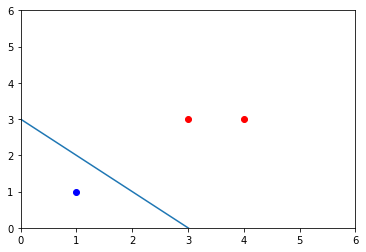

In [8]:
postive_X = X[np.where(Y>0)[0]]
plt.plot(postive_X[:,0], postive_X[:,1], 'ro')
negative_X = X[np.where(Y<0)[0]]
plt.plot(negative_X[:,0], negative_X[:,1], 'bo')
aX = np.arange(0, 6, 0.1)
aY = (-b - w[0]*aX)/(w[1]+epsilon)
plt.axis([0,6, 0, 6])
plt.plot(aX, aY)
alpha

In [9]:
def perceptron_duality_gram(X, Y, eta):
    alpha = np.zeros((X.shape[0], 1)) ## 整个过程中每个样本误分类的次数n_i
    b = 0
    M = []
    Gram_Matrix = np.dot(X, X.T)
    def get_M():
        M.clear()
        for index, (x, y) in enumerate(zip(X, Y)):
            if y*(eta * np.sum(Gram_Matrix[index, :][:, np.newaxis] * Y * alpha) + b) <= 0:
                M.append(index)
        return M
    while len(get_M()) > 0:
        i = np.random.choice(M)
        x, y = X[i], Y[i]
        alpha[i] = alpha[i] + 1
        b = b + eta * y
    w = eta * np.sum(alpha * Y * X, axis=0)
    return w, b, alpha

In [10]:
## 例2.2
X = np.array([[3,3],[4,3],[1,1]])
Y = np.array([[1], [1], [-1]])
w, b, alpha = perceptron_duality_gram(X, Y, 1)
w, b

(array([1., 0.]), array([-2]))

array([[0.],
       [1.],
       [3.]])

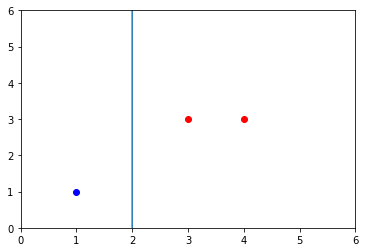

In [11]:
postive_X = X[np.where(Y>0)[0]]
plt.plot(postive_X[:,0], postive_X[:,1], 'ro')
negative_X = X[np.where(Y<0)[0]]
plt.plot(negative_X[:,0], negative_X[:,1], 'bo')
aX = np.arange(0, 6, 0.1)
aY = (-b - w[0]*aX)/(w[1]+epsilon)
plt.axis([0,6, 0, 6])
plt.plot(aX, aY)
alpha

## 柯西-施瓦茨不等式

有$N$维向量$a$,$b$，其内积满足不等式
$$\|<a,b>\| \le \|a\|\|b\|$$
展开
$$\left(\sum_{i=1}^N a_ib_i\right)^2 \le \left(\sum_{i=1}^N a_i^2\right)\left(\sum_{i=1}^N b_i^2\right)$$
当且仅当$a,b$共线时等式成立，网上一共给出了三种证法

### 证法1
$a,b$共线需要满足$a_ix+b_i=0$，对所有的$a,b$成立，让
$$
\begin{split}
\sum_{i=1}^N (a_ix+b_i)^2 & = \sum_{i=1}^N a_i^2x^2 + 2a_ib_ix + b_i^2 \\
    & = x^2\sum_{i=1}^N a_i^2 + x\sum_{i=1}^N a_ib_i + \sum_{i=1}^N b_i^2 \\
    & = Ax^2 + 2Bx + C \\
    & \geq 0
\end{split}
$$
当$A=0$，所有$a_i=0$，此时不等式成立

当$A>0$，因为$Ax^2 + 2Bx + C \geq 0$恒成立，所以$B^2-AC\le 0$成立（极值点：$(-\frac{B}{A}, AC-B^2)$）

### 证法2
证法2利用的二次方程组无解或有唯一解时判别式小于等于0，故
$$
\begin{split}
(2B)^2-4AC & = 4B^2-4AC \le 0 \\
    B^2 - AC & \le 0
\end{split}
$$